In [14]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot
import os
import time

%matplotlib inline
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def get_weights(self):
        return (self.wih, self.who)
    
    def saveModel(self, modelname):
        if not os.path.isdir(modelname):
            modelname = modelname + str(time.time())
            os.makedirs(modelname)
        numpy.save(modelname + "\\" + str("wih"), self.wih)
        numpy.save(modelname + "\\" + str("who"), self.who)
        
    def loadModel(self, modelname):
        self.wih = numpy.load(modelname + "/wih.npy")
        self.who = numpy.load(modelname + "/who.npy")
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs



In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# learning rate is
learning_rate = 0.1
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
print(n.get_weights()[0])
print(n.get_weights()[1])

[[ 0.02449745  0.01355563 -0.00968997 ... -0.00096125  0.07622864
  -0.01608599]
 [ 0.03895468  0.00034682  0.05793416 ... -0.04231925  0.03358581
   0.02291454]
 [ 0.0735631   0.05794886 -0.02281571 ...  0.04677578 -0.06683916
   0.01204523]
 ...
 [ 0.03093428 -0.04969668 -0.00190013 ... -0.0416802  -0.05235602
   0.03120797]
 [-0.02460428 -0.0140899  -0.04809533 ... -0.0338522   0.01594332
   0.02784381]
 [ 0.00741507  0.00908753 -0.00311976 ...  0.05589885  0.04503836
  -0.01902498]]
[[ 0.04128539  0.01094865  0.09758048 ... -0.03842493 -0.05436761
   0.00027201]
 [-0.08486978  0.00794343  0.1207574  ...  0.11501784 -0.01953939
  -0.04662072]
 [-0.0512148   0.0763989  -0.09772571 ...  0.08432414  0.00369496
   0.13557444]
 ...
 [ 0.0790156   0.10250038 -0.02419265 ... -0.12879906 -0.07933774
   0.03248463]
 [ 0.05652156 -0.0063544  -0.02817128 ...  0.05290802  0.13392405
   0.07636539]
 [-0.13053709  0.12072856  0.08749056 ... -0.04645524  0.02355242
   0.02852986]]


In [3]:
# load the mnist training data CSV file into a list
#training_data_file = open("MNIST/mnist_train.csv", 'r')
#training_data_list = training_data_file.readlines()
#training_data_file.close()
#how many time should the data run
epochs=5
# train the neural network
# go through all records in the training data set
for e in range(epochs):
    break
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # Dividing the raw inputs which are in the range 0-255 by 255 will bring them into the range 0-1. 
        #We then need to multiply by 0.99 to bring them into the range 0.0 - 0.99. 
        #We then add 0.01 to shift them up to the desired range 0.01 to 1.00.
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [4]:
n.saveModel("models/mnist")

In [15]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# learning rate is
learning_rate = 0.1
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.loadModel("models/mnist1524245909.173807")

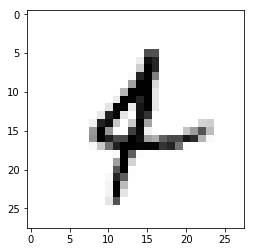

In [17]:
import numpy
import matplotlib.pyplot
#to NOT display the image in a different window
%matplotlib inline
data_file= open("MNIST/mnist_test.csv", 'r')
data_list= data_file.readlines()
data_file.close()
all_values= data_list[300].split(',')
#The [1:] takes all the values in array except the first one,which in out case is the label value.
#numpy.asfarray() is a numpy function to convert the text strings into real numbers and to create an array of those numbers
#.reshape((28,28)) makes sure the list of number is wrapped around every 28 elements to make a square matrix 28 by 28
image_array= numpy.asfarray(all_values[1:]).reshape((28,28))
#select a greyscale colour palette with cmap=’Greys’ to better show the handwritten characters.
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [18]:
output = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
highest = 0
highest_n = 0
for index, value in enumerate(output):
    print(str(index) + ":" + str(value))
    if value > highest:
        highest = value
        highest_n = index
print("I guessed " + str(highest_n) + " with a value of " + str(highest))


0:[0.0009938]
1:[0.08119644]
2:[0.00583485]
3:[0.00263129]
4:[0.95674617]
5:[0.00010527]
6:[0.1277421]
7:[0.01658217]
8:[1.58728942e-05]
9:[0.00127374]
I guessed 4 with a value of [0.95674617]


In [19]:
# load the mnist test data CSV file into a list
test_data_file = open("MNIST/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
#go through all the records in the test data set
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    inputs=(numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs=n.query(inputs)
    label = numpy.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass 
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9732
